# Projeto Prático 2 - Redes Neurais - 2020
## O neurônio de Rosenblatt

<img src="https://www.researchgate.net/profile/Germano_Rosa/publication/262747683/figure/fig1/AS:392393250623493@1470565249417/Figura-1-Modelo-de-um-neuronio-perceptron-de-Rosenblatt-Fonte-Adaptado-de-Medeiros.png" width=600px height=200px />

### Elaborado por: 

* Carlos Diego Ferreira
* João Victor de Oliveira
* Luiz Carlos Silva
* Mikael Fonseca

# Descrição Geral do projeto

Está dividido em 3 grandes partes, sendo elas
1. Implementação e treino de um neurônio apenas
2. Testes com diferentes configurações de hiper parâmetros
3. Treino em holdout + medição de desempenho

Este notebook é referente à parte 3

# Sumário:

**0. [Seção 0: Validação Holdout em Problema Não-Linearmente Separável](#id0)** <br>
**1. [Seção 1: Carregar Dataset](#id1)** <br>
**2. [Seção 2: Visualização dos Dados](#id2)** <br>
**3. [Seção 3: Holdout](#id3)** <br>
**4. [Seção 4: Treinamento](#id4)** <br>
**5. [Seção 5: Métricas](#id5)** <br>
**6. [Seção 6: Resultados](#id6)** <br>
**6. [Seção 7: Gráficos](#id7)** <br>


<a id="id0"></a> <br> 
# **Parte 3: Validação Holdout em Problema Não-Linearmente Separável:** 

Treinamento para um problema não linearmente separável, incluindo visualizações que demonstrem a natureza do dataset, o processo de treinamento e os resultados de predição obtidos pelo neurônio.

<a id="id1"></a> <br> 
## **Carregar Dataset:** 

In [43]:
import numpy as np
import pandas as pd
import matplotlib
import random
from matplotlib import pyplot as plt
from matplotlib.colors import ListedColormap
from mpl_toolkits import mplot3d
from perceptron import Perceptron
from dataset_loader import loadDataset

In [46]:
X, Y = loadDataset('../data/dataHoldout.txt');
print(X.shape, Y.shape)
#     x1           x2      y

[[-0.29322959 -0.09065359  1.        ]
 [ 0.07988839  0.21101297  1.        ]
 [-0.07825563 -0.08083512  1.        ]
 [-0.46833414 -0.10620722  1.        ]
 [ 0.46304142  0.09405471  1.        ]]
(800, 2) (800,)


<a id="id2"></a> <br> 
## Visualização dos Dados
Verificamos se o dataset apresenta dados que são linearmente separáveis.

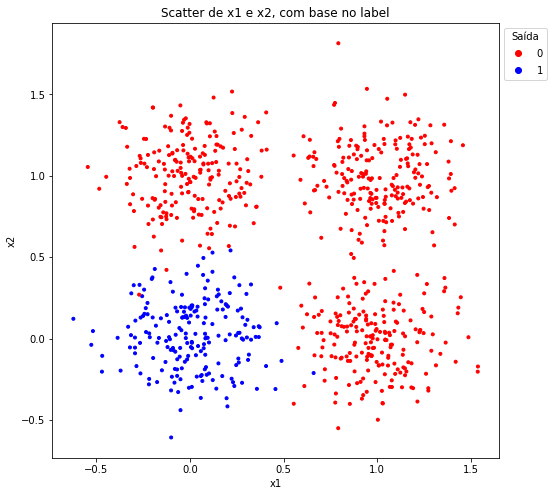

In [33]:
X1 = X[:,0]
X2 = X[:,1]

# def get_line_y(x, c0, c1):
#     return c0 + c1 * x

# c0 = p.weights[0]/p.weights[2]
# c1 = -p.weights[1]/p.weights[2]

# lineX = np.array([X1.min(), X1.max()])
# lineY = np.array([get_line_y(X1.min(), c0, c1), get_line_y(X1.max(), c0, c1)])

binary_cmap = ListedColormap(['red', 'blue'])

fig, ax = plt.subplots(figsize=(8,8))
ax.set(xlabel='x1', ylabel='x2',
       title='Scatter de x1 e x2, com base no label')

scatter = ax.scatter(X1, X2, c=Y, marker=".", cmap=binary_cmap)
# ax.plot(lineX, lineY, color="black", alpha= 0.5)

legend1 = ax.legend(*scatter.legend_elements(),
                    loc="upper left", title="Saída", bbox_to_anchor=(1.0, 0.5, 0.5, 0.5))


##### Com base no scatterplot é claramente impossível passar uma reta linear que divida os dois labels de forma satisfatória

<a id="id3"></a> <br> 
## Holdout
Divisão do dataset em 70% treinamento e 30% teste.

In [34]:
#deve-se implementar uma função que divida os dados em conjunto de treino e de teste.
def holdout_split(X, Y, train_split = 0.7, random_state = 56, shuffle = False):
    s = np.arange(X.shape[0])
    np.random.shuffle(s)
    X = X[s]
    Y = Y[s]
    
    state = np.random.RandomState(random_state)
    arr_rand = state.rand(X.shape[0])
    split = arr_rand < np.percentile(arr_rand, train_split*100)
    x_train = X[split]
    y_train = Y[split]
    x_test =  X[~split]
    y_test = Y[~split]
    return x_train, x_test, y_train, y_test

In [35]:
# X, Y = shuffle(X, Y)
x_train, x_test, y_train, y_test = holdout_split(X, Y, shuffle = True)
print(x_train.shape, x_test.shape)

(560, 2) (240, 2)


<a id="id4"></a> <br> 
## Treinamento
Ajustamento do neurônio até 100 épocas

In [36]:
model = Perceptron()
model.fit(x_train, y_train, num_epochs = 100, shuffle = True, learning_rate=0.01, sampling_range = 1)

Pesos iniciais: [-0.49412628 -0.2868741   0.03463947]
------ Época 1 ------
Novos pesos: [-0.48412628 -0.29775509  0.03048678]
Novos pesos: [-0.47412628 -0.3104508   0.02118849]
Novos pesos: [-0.46412628 -0.31262214  0.01260715]
Novos pesos: [-0.45412628 -0.32358002  0.01477771]
Novos pesos: [-0.44412628 -0.33497934  0.01546459]
Novos pesos: [-0.43412628 -0.34316723  0.00436221]
Novos pesos: [-0.42412628 -0.3506018  -0.0042994 ]
Novos pesos: [-0.41412628 -0.35923434 -0.01095487]
Novos pesos: [-0.40412628 -0.36017329 -0.01738915]
Novos pesos: [-0.39412628 -0.37052026 -0.02964535]
Novos pesos: [-0.38412628 -0.3718711  -0.04117124]
Novos pesos: [-0.37412628 -0.37540828 -0.04925706]
Novos pesos: [-0.36412628 -0.37536027 -0.06013554]
Novos pesos: [-0.35412628 -0.3777544  -0.07177137]
Novos pesos: [-0.34412628 -0.37773346 -0.08494749]
Novos pesos: [-0.33412628 -0.37986474 -0.09447786]
Novos pesos: [-0.32412628 -0.37651348 -0.10625267]
Novos pesos: [-0.31412628 -0.38032633 -0.116186  ]
Novos 

Novos pesos: [-0.05412628 -0.10251827 -0.09558833]
Novos pesos: [-0.04412628 -0.10970885 -0.09300118]
Novos pesos: [-0.03412628 -0.10699486 -0.09569594]
Novos pesos: [-0.04412628 -0.1035933  -0.09499981]
Novos pesos: [-0.03412628 -0.09875124 -0.10419627]
Total de ajustes: 18
------ Época 29 ------
Novos pesos: [-0.04412628 -0.09412083 -0.10325573]
Novos pesos: [-0.03412628 -0.09140684 -0.10595048]
Novos pesos: [-0.04412628 -0.08986967 -0.10324267]
Novos pesos: [-0.03412628 -0.08691165 -0.10886925]
Novos pesos: [-0.04412628 -0.08709179 -0.10489735]
Novos pesos: [-0.05412628 -0.08638891 -0.10099172]
Novos pesos: [-0.04412628 -0.0941813  -0.09761792]
Novos pesos: [-0.03412628 -0.09292898 -0.10183373]
Novos pesos: [-0.04412628 -0.09172694 -0.09773475]
Novos pesos: [-0.05412628 -0.09052166 -0.0924586 ]
Novos pesos: [-0.06412628 -0.08835414 -0.08704883]
Novos pesos: [-0.05412628 -0.097278   -0.08430667]
Novos pesos: [-0.04412628 -0.09600846 -0.0918049 ]
Novos pesos: [-0.05412628 -0.09336905 

Novos pesos: [-0.03412628 -0.04021066 -0.04850983]
Novos pesos: [-0.02412628 -0.05029835 -0.04686091]
Novos pesos: [-0.01412628 -0.04734033 -0.05248749]
Novos pesos: [-0.02412628 -0.04543714 -0.05116238]
Novos pesos: [-0.03412628 -0.04279773 -0.0478873 ]
Novos pesos: [-0.02412628 -0.05000123 -0.0459995 ]
Novos pesos: [-0.01412628 -0.04802205 -0.05330727]
Novos pesos: [-0.02412628 -0.04731917 -0.04940164]
Novos pesos: [-0.01412628 -0.04606685 -0.05361745]
Novos pesos: [-0.02412628 -0.04326023 -0.05231431]
Novos pesos: [-0.03412628 -0.04109272 -0.04690454]
Novos pesos: [-0.02412628 -0.03662419 -0.05683539]
Novos pesos: [-0.03412628 -0.03542215 -0.05273641]
Novos pesos: [-0.02412628 -0.04380253 -0.05316794]
Novos pesos: [-0.01412628 -0.0509931  -0.05058079]
Novos pesos: [-0.02412628 -0.04822472 -0.05057464]
Novos pesos: [-0.03412628 -0.04701944 -0.04529849]
Novos pesos: [-0.02412628 -0.05477727 -0.04136639]
Novos pesos: [-0.01412628 -0.05174216 -0.05022105]
Novos pesos: [-0.02412628 -0.05

Novos pesos: [-0.01412628 -0.04401506 -0.04949544]
Novos pesos: [-0.02412628 -0.0430641  -0.04594039]
Novos pesos: [-0.01412628 -0.04181178 -0.0501562 ]
Novos pesos: [-0.02412628 -0.03964427 -0.04474643]
Total de ajustes: 24
------ Época 81 ------
Novos pesos: [-0.01412628 -0.04756076 -0.03924115]
Novos pesos: [-0.00412628 -0.04484677 -0.04193591]
Novos pesos: [-0.01412628 -0.04364473 -0.03783693]
Novos pesos: [-0.02412628 -0.0432194  -0.03336698]
Novos pesos: [-0.01412628 -0.04022811 -0.04119373]
Novos pesos: [-0.00412628 -0.03727009 -0.04682031]
Novos pesos: [-0.01412628 -0.03573292 -0.0441125 ]
Novos pesos: [-0.02412628 -0.0326642  -0.04296122]
Novos pesos: [-0.01412628 -0.02782215 -0.05215769]
Novos pesos: [-0.00412628 -0.0336069  -0.0515819 ]
Novos pesos: [-0.01412628 -0.03352265 -0.04955897]
Novos pesos: [-0.02412628 -0.03370279 -0.04558706]
Novos pesos: [-0.01412628 -0.04437328 -0.04261805]
Novos pesos: [-0.02412628 -0.04173386 -0.03934296]
Novos pesos: [-0.01412628 -0.03836271 

<a id="id5"></a> <br> 
## Métricas
Implementação das funções (ou métricas) que retornam o desempenho do neurônio

In [37]:
def confusion_matrix(true, pred):
    cm = np.zeros((2,2))
    for p, t in zip(pred, true):
        cm[int(p)][int(t)] += 1
    return cm

def precision(cm):
    return cm[1][1]/(cm[1][1]+cm[0][1])

def recall(cm):
    return cm[1][1]/(cm[1][1]+cm[1][0])

def f1(precision, recall):
    return 2*precision*recall/(precision+recall)

def accuracy(cm):
    return (cm[1][1] + cm[0][0])/(np.sum(cm))

def metrics_report(y_pred, y_true):
    
    cm = confusion_matrix(y_true, y_pred)
    prec = precision(cm)
    rec = recall(cm)
    print('Matriz de Confusão')
    print(cm)
    print('---------------------------------')
    print('Acurácia: {}'.format(accuracy(cm)))
    print('Precisão: {}'.format(prec))
    print('Recall: {}'.format(rec))
    print('F1-Score: {}'.format(f1(prec, rec)))


In [38]:
y_pred = model.predict(x_test)

<a id="id6"></a> <br>
## Resultados Obtidos

In [39]:
# para conjunto de testes
metrics_report(y_test, y_pred)

Matriz de Confusão
[[163.   8.]
 [  4.  65.]]
---------------------------------
Acurácia: 0.95
Precisão: 0.8904109589041096
Recall: 0.9420289855072463
F1-Score: 0.9154929577464788


In [40]:
y_pred_train = model.predict(x_train)

In [41]:
#para conjunto de treino
metrics_report(y_train, y_pred_train)

Matriz de Confusão
[[415.  14.]
 [  4. 127.]]
---------------------------------
Acurácia: 0.9678571428571429
Precisão: 0.900709219858156
Recall: 0.9694656488549618
F1-Score: 0.9338235294117646


##### Com base nesses resultados, é possível perceber que a solução possui qualidade aceitável para resolver este problema de classificação. As métricas para os dados de treino mostram que o modelo conseguiu aprender bem a classificá-los, enquanto que as métricas para o conjunto de testes mostram que o modelo conseguiu generalizar, já que efetivamente classificou dados novos.

<a id="id7"></a> <br>
### Plotagem do Gráfico

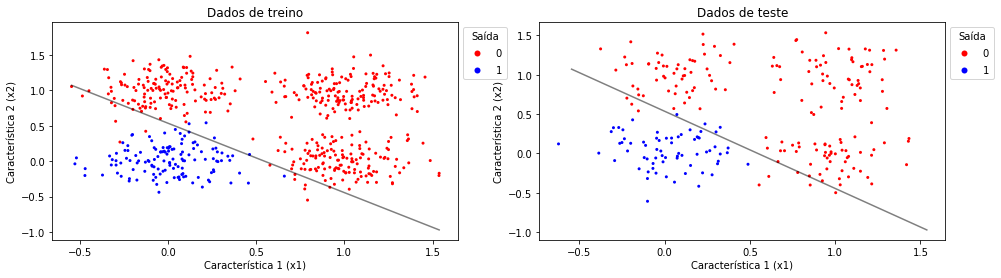

In [42]:
X1 = x_train[:,0]
X2 = x_train[:,1]

def get_line_y(x, c0, c1):
    return c0 + c1 * x

c0 = model.weights[0]/model.weights[2]
c1 = -model.weights[1]/model.weights[2]

lineX = np.array([X1.min(), X1.max()])
lineY = np.array([get_line_y(X1.min(), c0, c1), get_line_y(X1.max(), c0, c1)])

binary_cmap = ListedColormap(['red', 'blue'])

fig, ax = plt.subplots(1, 2, figsize=(16,4))
ax[0].set(xlabel='Característica 1 (x1)', ylabel='Característica 2 (x2)',
       title='Dados de treino')

scatter = ax[0].scatter(X1, X2, c=y_train, marker=".", cmap=binary_cmap, linewidth=0)
ax[0].plot(lineX, lineY, color="black", alpha= 0.5)

legend1 = ax[0].legend(*scatter.legend_elements(),
                    loc="upper left", title="Saída", bbox_to_anchor=(1.0, 0.5, 0.5, 0.5))
X1 = x_test[:,0]
X2 = x_test[:,1]

ax[1].set(xlabel='Característica 1 (x1)', ylabel='Característica 2 (x2)',
       title='Dados de teste')

scatter = ax[1].scatter(X1, X2, c=y_test, marker=".", cmap=binary_cmap, linewidth=0)
ax[1].plot(lineX, lineY, color="black", alpha= 0.5)

legend1 = ax[1].legend(*scatter.legend_elements(),
                    loc="upper left", title="Saída", bbox_to_anchor=(1.0, 0.5, 0.5, 0.5))
